In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Data Preprocessing

In [282]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin and Embarked has less data counts

In [284]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is null  value in the dataset in , age ,cabin and Embarked

<AxesSubplot:>

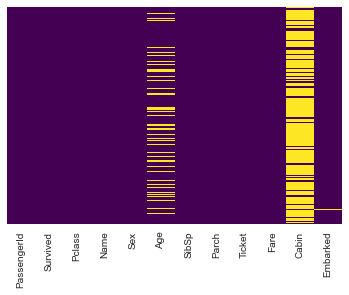

In [285]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

maximum data in null in cabin and few null in Age column, we can drop the Cabin column

In [286]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fareb
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



# EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

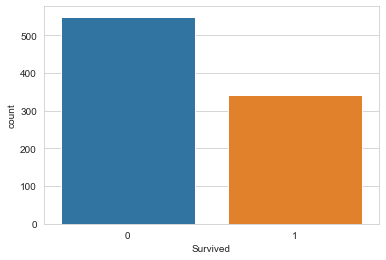

In [287]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

In [288]:
df.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

Found that 549 person has died and 342 has survivived

<AxesSubplot:xlabel='Survived', ylabel='count'>

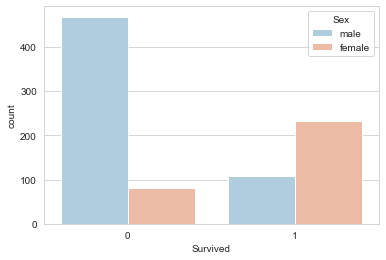

In [289]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

Maximum people are male who has died. Female raio is more in survived people

<AxesSubplot:xlabel='Pclass', ylabel='count'>

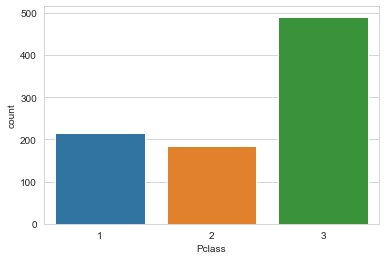

In [290]:
sns.countplot(x='Pclass',data=df)

The maximum people were travelling in class 3

<AxesSubplot:xlabel='Survived', ylabel='count'>

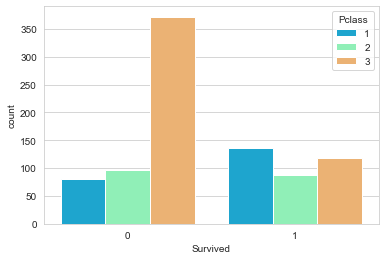

In [291]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

Maximum people belongs to class 3 who has died.

<AxesSubplot:xlabel='Age'>

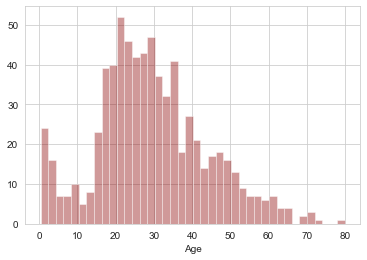

In [292]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

the maximum people travelled were in the age range of 20 - 40


<AxesSubplot:xlabel='SibSp', ylabel='count'>

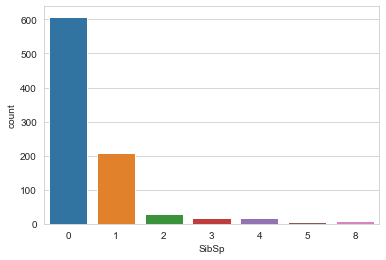

In [293]:
sns.countplot(x='SibSp',data=df)

Maximum passengers are single

In [294]:
df.value_counts('SibSp')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

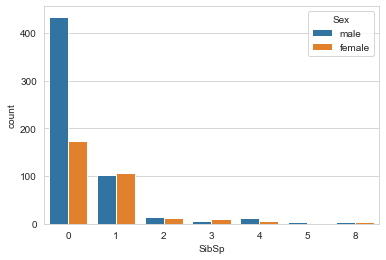

In [295]:
sns.countplot(x='SibSp',hue='Sex',data=df)

Single Passengers - 608
Passengers with spouse - 209
Parents with single child - 28
Parents with sibling - 16
Family with 5 members - 5
Family with 8 members - 7


In [296]:
df.value_counts('Parch')

Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
dtype: int64

Number of person without parents/ children are more - 678
Number of person with either parents/ children are  - 118


<AxesSubplot:xlabel='Fare', ylabel='Count'>

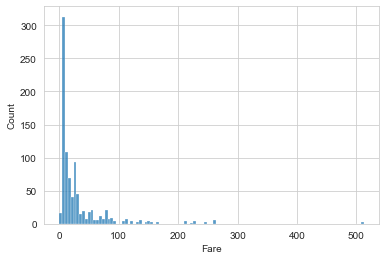

In [297]:
sns.histplot(df['Fare'])

<AxesSubplot:>

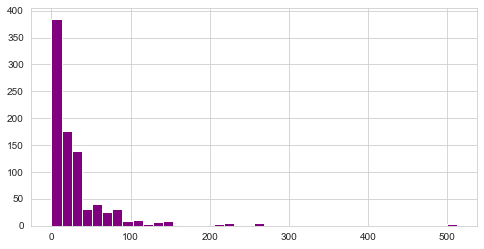

In [298]:
df['Fare'].hist(color='purple',bins=40,figsize=(8,4))

Maximum Ticket sold was less than 20

sns.catplot(x='Pclass',kind='bar',y='Fare', hue='Sex', data=df)

(i) First class fare is above 60 and Female has paid much more than male for First clas.
(ii) Second class fare Approx 20 
(iii) Less than 20 is Class 3

In [299]:
df.value_counts('Cabin')

Cabin
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Length: 147, dtype: int64

Cabin is only cabin alloted to the passenger. It is not important data for prediction

In [300]:
df.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
dtype: int64

Maximum passengers  boarded from S, 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

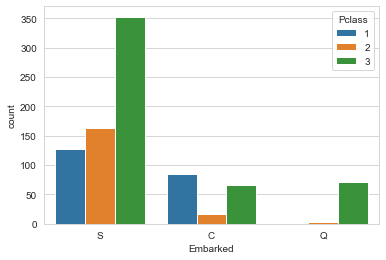

In [301]:
sns.countplot(x='Embarked', hue='Pclass',data=df)

Maximum Class -3 Passengers boarded from S port and there was no Class - 1 Passengers from Q port

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

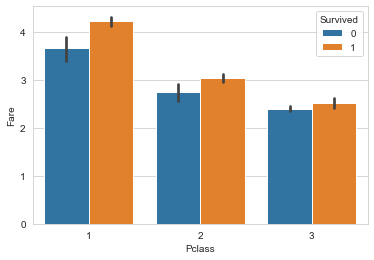

In [340]:
sns.barplot(data=df,x='Pclass',y='Fare',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

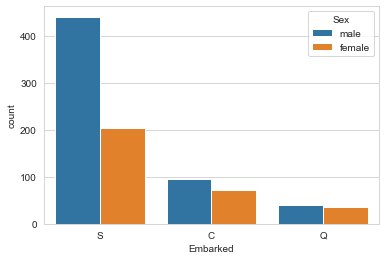

In [302]:
sns.countplot(x='Embarked', hue='Sex',data=df)

Maximum Male passengers are from S Port

<AxesSubplot:xlabel='Survived', ylabel='count'>

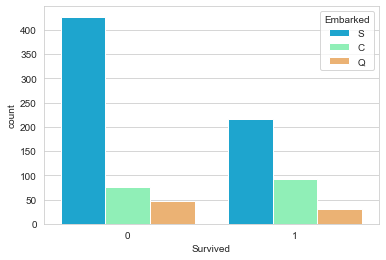

In [303]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=df,palette='rainbow')

No significant Outcome

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Engineering


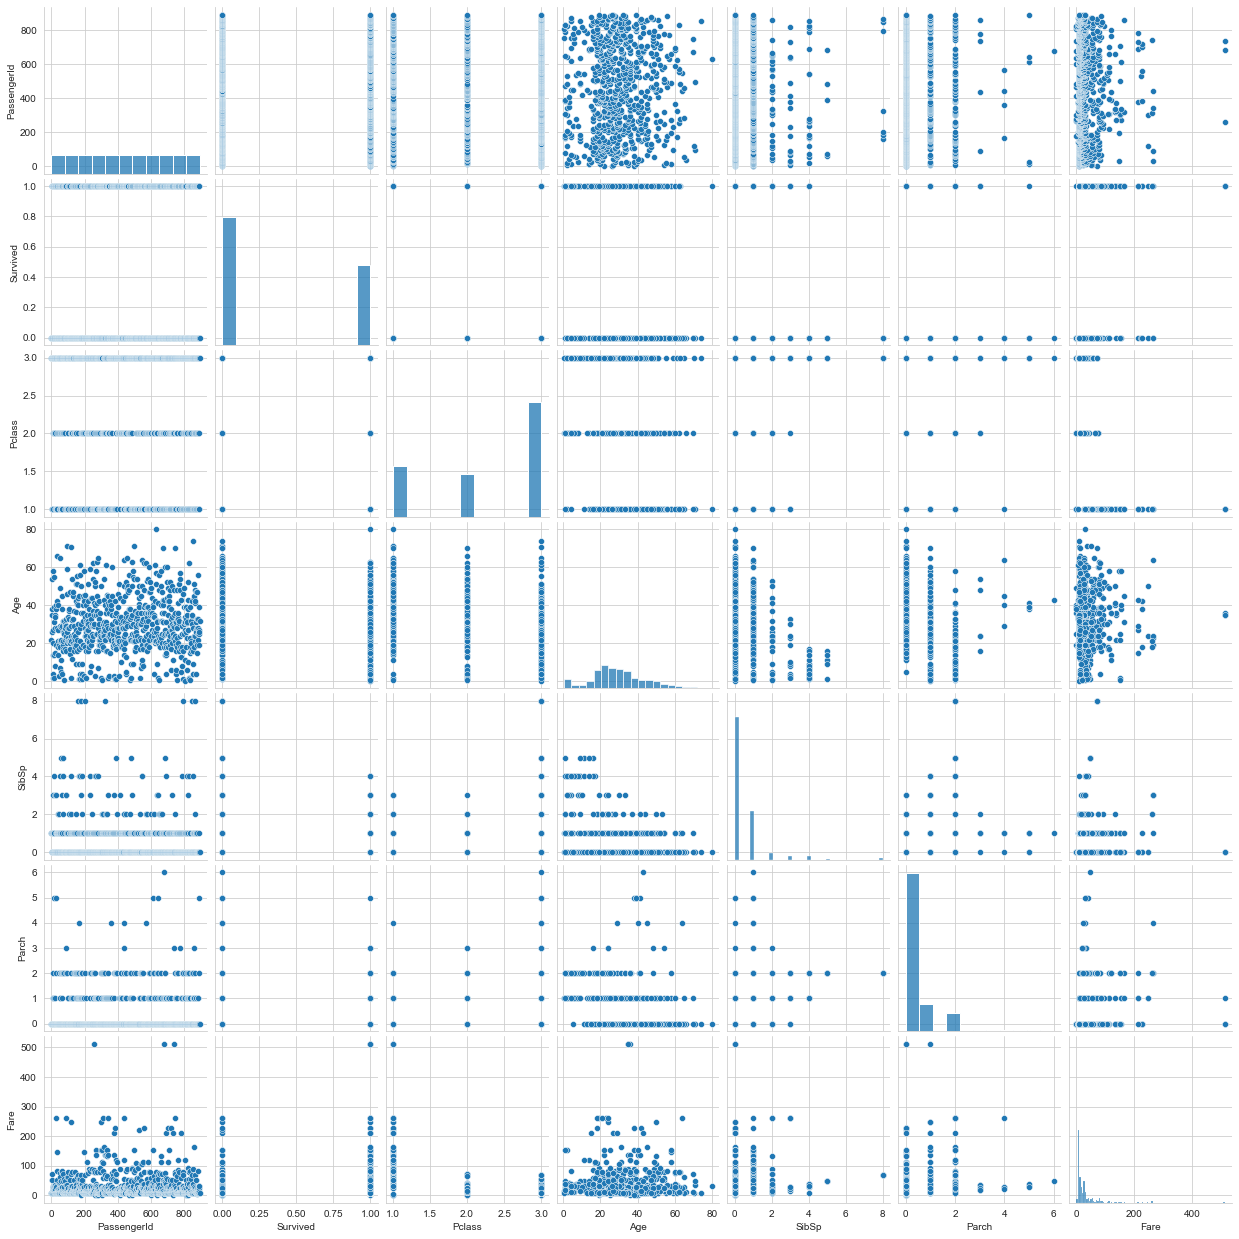

In [305]:
sns.pairplot(df)

Only Age and Fare in continous data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

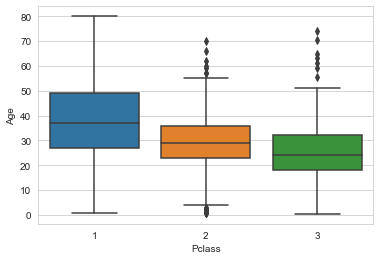

In [306]:
sns.boxplot(x='Pclass',y='Age',data=df)

Different classes has different mean class 1 mean =37
, class 2 mean=29, class3 mean=24

In [307]:
def fill_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    
    else:
        return age

Define a function for filling the null value of age

In [308]:
df['Age']=df[['Age','Pclass']].apply(fill_age,axis=1)

Applying the function to fill the age column

<AxesSubplot:>

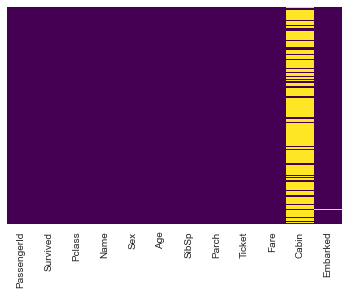

In [309]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The 'Cabin' column needs to be removed

In [310]:
df.drop('Cabin',axis=1,inplace=True) # Dropped the column Cabin

<AxesSubplot:>

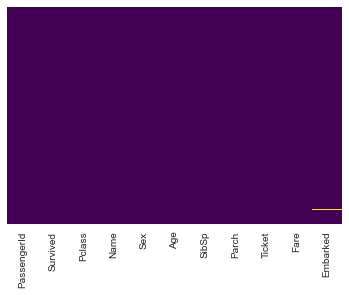

In [311]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [312]:
df.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
dtype: int64

Maximum number is 'S' , so we can fill null value with 'S'

In [313]:
df['Embarked']=df['Embarked'].fillna('S')

Filled the null value of 'Embarked' with 'S'

<AxesSubplot:>

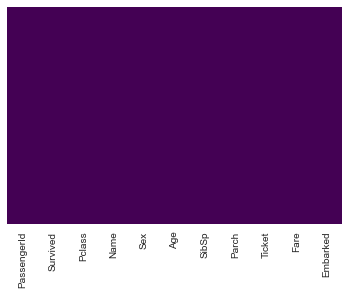

In [314]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

'Name' column is not required for Machine Learning, we can drop it 

In [315]:
df.drop('Name',axis=1,inplace=True)

'Passenger id' also not required for Machine Learning , we can drop it also

In [316]:
df.drop('PassengerId',axis=1,inplace=True)

'Ticket' also not required for Machine Learning , we can drop it also

In [317]:
df.drop('Ticket',axis=1,inplace=True)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [319]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Found dataset correct for spliting and applying the ML

In [320]:
df.shape

(891, 8)

In [321]:
for label in "SCQ":
    df[label]=df['Embarked']==label

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,S,C,Q
0,0,3,male,22.0,1,0,7.2500,S,True,False,False
1,1,1,female,38.0,1,0,71.2833,C,False,True,False
2,1,3,female,26.0,0,0,7.9250,S,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,True,False,False


In [322]:
df.drop('Embarked',axis=1,inplace=True)

In [323]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
0,0,3,male,22.0,1,0,7.2500,True,False,False
1,1,1,female,38.0,1,0,71.2833,False,True,False
2,1,3,female,26.0,0,0,7.9250,True,False,False
3,1,1,female,35.0,1,0,53.1000,True,False,False
4,0,3,male,35.0,0,0,8.0500,True,False,False


In [324]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['S']=le.fit_transform(df['S'])
df['C']=le.fit_transform(df['C'])
df['Q']=le.fit_transform(df['Q'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
0,0,3,1,22.0,1,0,7.2500,1,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,1,0,0
3,1,1,0,35.0,1,0,53.1000,1,0,0
4,0,3,1,35.0,0,0,8.0500,1,0,0


In [325]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [326]:
threshold=3
print(np.where(z>3))

(array([  5,  13,  16,  16,  22,  25,  27,  28,  32,  44,  46,  47,  50,
        59,  68,  71,  82,  86,  88,  96, 109, 116, 116, 118, 119, 126,
       143, 156, 159, 164, 167, 171, 171, 180, 182, 186, 188, 196, 198,
       201, 208, 214, 233, 241, 245, 258, 260, 261, 264, 266, 274, 278,
       278, 280, 289, 299, 300, 301, 303, 311, 322, 324, 330, 341, 358,
       359, 360, 364, 368, 377, 380, 386, 388, 411, 412, 421, 428, 437,
       438, 438, 459, 468, 480, 493, 501, 502, 510, 517, 525, 527, 541,
       542, 552, 557, 560, 567, 573, 593, 610, 612, 613, 626, 629, 630,
       638, 653, 654, 657, 672, 678, 679, 680, 683, 686, 689, 697, 700,
       703, 716, 718, 727, 730, 736, 737, 742, 745, 749, 767, 768, 774,
       776, 778, 779, 787, 787, 790, 792, 813, 824, 825, 828, 846, 850,
       851, 858, 863, 885, 885, 890], dtype=int64), array([9, 5, 4, 9, 9, 5, 6, 9, 9, 9, 9, 9, 4, 4, 4, 4, 9, 5, 6, 3, 9, 3,
       9, 6, 4, 9, 9, 9, 4, 4, 5, 4, 9, 4, 4, 9, 9, 9, 9, 4, 9, 9, 4, 9,
       9,

In [327]:
df.shape

(891, 10)

In [328]:
df=df[(z<4).all(axis=1)]
print(df.shape)

(859, 10)


In [329]:
loss=(891-859)/891*100
print(loss)

3.5914702581369253


<AxesSubplot:xlabel='Fare', ylabel='Density'>

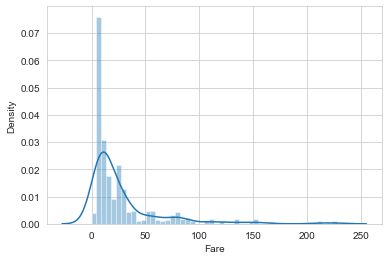

In [330]:
sns.distplot(df['Fare'])

In [331]:
df.skew()

Survived    0.461957
Pclass     -0.628401
Sex        -0.649769
Age         0.554766
SibSp       2.550187
Parch       2.057853
Fare        2.903204
S          -1.004502
C           1.604697
Q           2.903295
dtype: float64

In [332]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
count,859.00000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,0.38766,2.308498,0.654249,29.077031,0.424913,0.298021,28.029447,0.724098,0.187427,0.088475
std,0.48750,0.831523,0.475890,13.256811,0.804929,0.625513,35.284947,0.447228,0.390481,0.284150
min,0.00000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.00000,3.000000,1.000000,26.000000,0.000000,0.000000,13.500000,1.000000,0.000000,0.000000
75%,1.00000,3.000000,1.000000,36.250000,1.000000,0.000000,29.412500,1.000000,0.000000,0.000000
max,1.00000,3.000000,1.000000,80.000000,4.000000,3.000000,227.525000,1.000000,1.000000,1.000000


In [333]:
df['Fare']=np.log(df['Fare']+1)

In [334]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
count,859.00000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,0.38766,2.308498,0.654249,29.077031,0.424913,0.298021,2.905457,0.724098,0.187427,0.088475
std,0.48750,0.831523,0.475890,13.256811,0.804929,0.625513,0.921259,0.447228,0.390481,0.284150
min,0.00000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2.000000,0.000000,22.000000,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000
50%,0.00000,3.000000,1.000000,26.000000,0.000000,0.000000,2.674149,1.000000,0.000000,0.000000
75%,1.00000,3.000000,1.000000,36.250000,1.000000,0.000000,3.414809,1.000000,0.000000,0.000000
max,1.00000,3.000000,1.000000,80.000000,4.000000,3.000000,5.431646,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

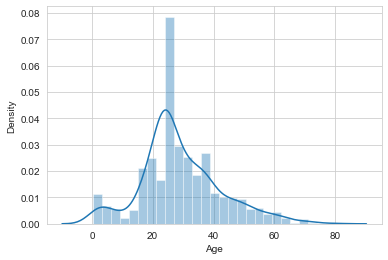

In [335]:
sns.distplot(df['Age'])

The 'Age' column is almost Normalized

<AxesSubplot:xlabel='Fare', ylabel='Density'>

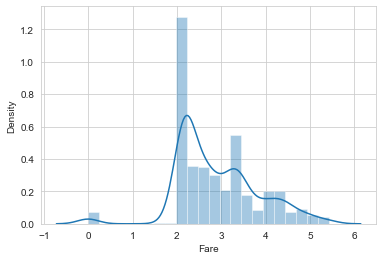

In [336]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

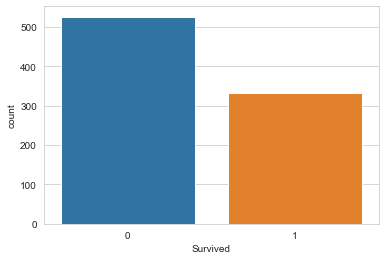

In [337]:
# checking class imbalance
sns.countplot(df['Survived'])

There is no class imbalance

<AxesSubplot:>

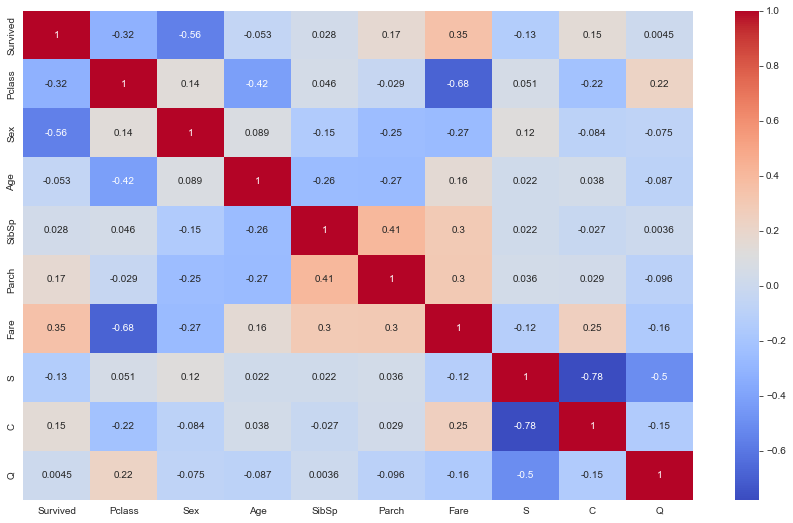

In [339]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

Fare has positive correlation with Susrvived

# Scaling and Spliting of Data

In [374]:
x_train=df.drop("Survived",axis=1)

In [375]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_train)

In [376]:
x=sc_x
x=pd.DataFrame(x,columns=x_train.columns)

Scaled the data and saved in x after converting into dataframe

In [377]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  859 non-null    float64
 1   Sex     859 non-null    float64
 2   Age     859 non-null    float64
 3   SibSp   859 non-null    float64
 4   Parch   859 non-null    float64
 5   Fare    859 non-null    float64
 6   S       859 non-null    float64
 7   C       859 non-null    float64
 8   Q       859 non-null    float64
dtypes: float64(9)
memory usage: 60.5 KB


In [378]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
0,0.832093,0.726959,-0.534152,0.714874,-0.47672,-0.863717,0.617275,-0.480270,-0.311549
1,-1.574532,-1.375593,0.673478,0.714874,-0.47672,1.493540,-1.620022,2.082163,-0.311549
2,0.832093,-1.375593,-0.232245,-0.528196,-0.47672,-0.778302,0.617275,-0.480270,-0.311549
3,-1.574532,-1.375593,0.447047,0.714874,-0.47672,1.178832,0.617275,-0.480270,-0.311549
4,0.832093,0.726959,0.447047,-0.528196,-0.47672,-0.763196,0.617275,-0.480270,-0.311549


In [379]:
y=df['Survived']
y.shape

(859,)

In [413]:
#Choosing the best random state for our ML Model
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)




Best Accuracy is 0.8488372093023255  on Random state 160


Found best random state 160

# Model Training

In [412]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [414]:
def model_test(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=160)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [422]:
lr=LogisticRegression()
model_test(lr,x_train,y_train)

0.7734806629834254
[[95 19]
 [22 45]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       114
           1       0.70      0.67      0.69        67

    accuracy                           0.77       181
   macro avg       0.76      0.75      0.75       181
weighted avg       0.77      0.77      0.77       181



In [432]:
rf=RandomForestClassifier()
model_test(rf,x_train,y_train)

0.8011049723756906
[[100  14]
 [ 22  45]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       114
           1       0.76      0.67      0.71        67

    accuracy                           0.80       181
   macro avg       0.79      0.77      0.78       181
weighted avg       0.80      0.80      0.80       181



In [433]:
dtc=DecisionTreeClassifier()
model_test(dtc,x_train,y_train)

0.7624309392265194
[[96 18]
 [25 42]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       114
           1       0.70      0.63      0.66        67

    accuracy                           0.76       181
   macro avg       0.75      0.73      0.74       181
weighted avg       0.76      0.76      0.76       181



In [434]:
gnb=GaussianNB()
model_test(gnb,x_train,y_train)

0.7624309392265194
[[92 22]
 [21 46]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       114
           1       0.68      0.69      0.68        67

    accuracy                           0.76       181
   macro avg       0.75      0.75      0.75       181
weighted avg       0.76      0.76      0.76       181



In [435]:
knn=KNeighborsClassifier(n_neighbors=5)
model_test(knn,x_train,y_train)

0.8066298342541437
[[100  14]
 [ 21  46]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       114
           1       0.77      0.69      0.72        67

    accuracy                           0.81       181
   macro avg       0.80      0.78      0.79       181
weighted avg       0.80      0.81      0.80       181



In [436]:
ad=AdaBoostClassifier(n_estimators=100)
model_test(ad,x_train,y_train)

0.7734806629834254
[[94 20]
 [21 46]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       114
           1       0.70      0.69      0.69        67

    accuracy                           0.77       181
   macro avg       0.76      0.76      0.76       181
weighted avg       0.77      0.77      0.77       181



# Cross Validataion

In [437]:
from sklearn.model_selection import cross_val_score
model=(lr,rf,dtc,gnb,knn,ad)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of',m)
    print(score.mean())
    print(20*'-')

Mean Accuracy of LogisticRegression()
0.7904800761593908
--------------------
Mean Accuracy of RandomForestClassifier()
0.8079491364069089
--------------------
Mean Accuracy of DecisionTreeClassifier()
0.782326941384469
--------------------
Mean Accuracy of GaussianNB()
0.7602407180742554
--------------------
Mean Accuracy of KNeighborsClassifier()
0.8137562899496803
--------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8044335645314838
--------------------


# RUC_AUC Score

AUC Score of  LogisticRegression()
0.7988886113886114




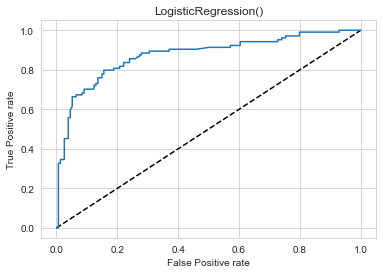

----------------------------------------
AUC Score of  RandomForestClassifier()
0.8052572427572426




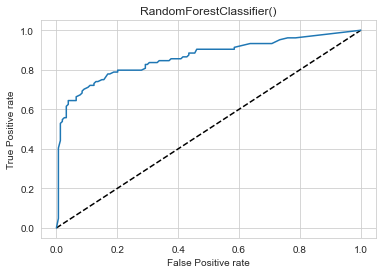

----------------------------------------
AUC Score of  DecisionTreeClassifier()
0.7569305694305695




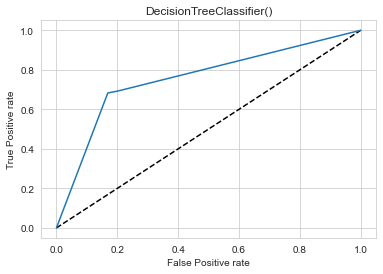

----------------------------------------
AUC Score of  GaussianNB()
0.7617382617382618




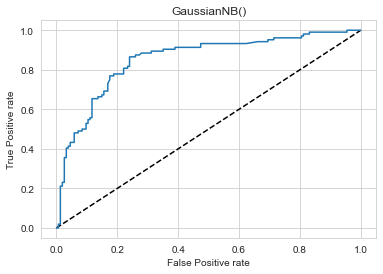

----------------------------------------
AUC Score of  KNeighborsClassifier()
0.7827797202797202




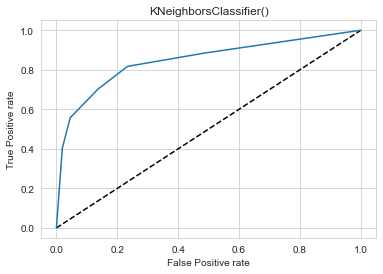

----------------------------------------
AUC Score of  AdaBoostClassifier(n_estimators=100)
0.8149975024975025




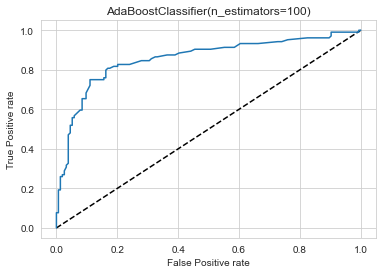

----------------------------------------


In [438]:
from sklearn.metrics import roc_curve, roc_auc_score
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of ',m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print(20*'--')

In [439]:
Performance={'Model':['LR','RF','DTC','GNB','KNN','AD']
            ,'Accuracy':[77,80,76,76,80,77],
            'Cross Val Score':[79,80,78,76,81,80],
            'Diff':[79-77,80-80,78-76,76-76,81-80,80-77],
            'ROC_AUC Score':[79,80,75,76,78,81]}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Accuracy,Cross Val Score,Diff,ROC_AUC Score
0,LR,77,79,2,79
1,RF,80,80,0,80
2,DTC,76,78,2,75
3,GNB,76,76,0,76
4,KNN,80,81,1,78
5,AD,77,80,3,81


After checking the comparison performance of each model we found that RandomForestClassifier is the best fit model for this dataset with maximum accuracy and minimum cross valiadation difference 

# Hyper Tuning

In [440]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}


In [408]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

In [441]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 200]})

In [442]:
GSV.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

In [444]:
final_mod=RandomForestClassifier(criterion='gini',max_depth=6,n_estimators=100)
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.59689922480621


After Hypertuning the model performance has increased , now we ready to save the model

In [446]:
import joblib
joblib.dump(final_mod,'Titanic_Model.obj')

['Titanic_Model.obj']